# 1. Dijkstra's Algorithm and Analysis






## A quick summary of Dijkstra's Algorithm
Let $\text{dist}[x]$ denote the tentative distance from the source node to node $x$.
### Step 0: Initialization
- Set $\text{dist}[s] = 0$ for the source node $s$.
- For every other node $v \neq s$, set $\text{dist}[v] = \infty$.
- Set all nodes as unvisited.

---

### Step 1: Select Next Node
- Find an unvisited node $u$ with minimal $\text{dist}[u]$ (usually done with a priority queue).
- Mark $u$ as visited.

---

### Step 2: Edge Relaxation
- For every neighbor $v$ of $u$ reached by edge $(u, v)$ with weight $w$:
    - If $v$ is unvisited:
        - Update $\text{dist}[v] = \min(\text{dist}[v], \text{dist}[u] + w)$.

---

### Step 3: Repeat
- Repeat Steps 1 and 2 until all nodes have been visited (or the queue is empty).

---
Note: All implementations below also have an array $\text{p}$, where $\text{p}[x]$ is parent of $x$ in the shortest-path tree.

## Implementation 1
* Using *adjacency matrix* to represent the graph
* Using *array* to represent the priority queue

In [1]:
def dijkstra_a(matrix, s):
    n = len(matrix)
    dist = [inf] * n
    p = [-1] * n
    vis = [False] * n
    dist[s] = 0

    while True:
        u = -1
        minD = inf
        for v in range(n):
            if not vis[v] and dist[v] < minD:
                minD = dist[v]
                u = v

        if u == -1:
            break

        vis[u] = True

        for v in range(n):
            if not vis[v] and matrix[u][v] != inf:
                newD = dist[u] + matrix[u][v]
                if newD < dist[v]:
                    dist[v] = newD
                    p[v] = u

    return dist, p

### Complexity Analysis

### Step 0: Initialization
```python
  dist = [inf] * n
  p = [-1] * n
  vis = [False] * n
  dist[s] = 0
```
- This step consists only of setting up 3 arrays: `dist`, `vis` and `p`, so it's $O(|V|)$.

---

### Step 1: Select Next Node
```python
  u = -1
  minD = inf
  for v in range(n):
    if not vis[v] and dist[v] < minD:
      minD = dist[v]
      u = v

  if u == -1:
    break

  vis[u] = True
```
- To find the unvisited node $u$ with the smallest distance to $s$, we loop through all the nodes and compare one-by-one, resulting in $O(|V|)$ time complexity.
---

### Step 2: Edge Relaxation
```python
for v in range(n):
  if not vis[v] and matrix[u][v] != inf:
    newD = dist[u] + matrix[u][v]
    if newD < dist[v]:
      dist[v] = newD
      p[v] = u
```
- Since we represent the graph via an adjacency matrix, to find all edges originating from $u$, we must loop through all possible nodes $v$, resulting in $O(|V|)$ time complexity.
---

### Step 3: Repeat
- We repeat steps 1 and 2 at most $|V|$ times, since each node can be selected once or none depending on whether it is reachable from $S$.
- Thus, time complexity for this step is $O(|V| \cdot |V|) = O(|V| ^ 2)$.

---
Overall, time complexity of this implementation is total time of Step 0 and Step 3 = $O(|V|) + O(|V|^2) = O(|V| ^ 2)$.

## Implementation 2
* Using *adjacency lists* to represent the graph
* Using *heap* (python *heapq*) to represent the priority queue

In [ ]:
from math import inf
import heapq

def dijkstra_b(graph, s):
    n = len(graph)
    dist = [inf] * n
    p = [-1] * n

    vis = [False] * n

    dist[s] = 0
    pq = [(0, s)]

    while pq:
        d, u = heapq.heappop(pq)
        if vis[u]:
            continue
        vis[u] = True
        for v, w in graph[u]:
            newD = d + w
            if newD < dist[v]:
                dist[v] = newD
                p[v] = u
                heapq.heappush(pq, (newD, v))

    return dist, p


### Complexity Analysis

### Step 0: Initialization
```python
  dist = [inf] * n
  p = [-1] * n

  vis = [False] * n

  dist[s] = 0
  pq = [(0, s)]
```
- This step consists only of setting up 3 arrays: `dist`, `vis` and `p` and the priority queue `pq`, so it's $O(|V|)$.

---

### Steps 1, 2, 3: Select Next Node, Edge Relaxation and Repeats
```python
  while pq:
    d, u = heapq.heappop(pq)
    if vis[u]:
      continue
    vis[u] = True
    for v, w in graph[u]:
      newD = d + w
      if newD < dist[v]:
        dist[v] = newD
        p[v] = u
        heapq.heappush(pq, (newD, v))
```
- To calculate the total complexity of this loop, we need to know how many items are pushed into the heap, which is bounded by the number of relaxation attempts (since there's 1 heap push for a successful relaxation).
- Every time we select a node, we loop through all of its outgoing edges.
- Thus, each edge is iterated by exactly once. In the worst case scenario, every edge contributes to one successful relaxation, so the total number of heap pushes is $O(|E|)$.
- Since heap push and pop operations are logarithmic to the number of elements in the heap, the time complexity for this loop is $O(|E| \cdot log(|E|))$.
---
Overall, time complexity of this implementation is $O(|V| + |E| \cdot log(|E|))$.

This is more commonly written as $O(|V| + |E| \cdot log(|V|))$, since $|E| \le |V|^2 ⇔ log(|E|) = O(log(|V|))$.

## Theoretical Complexity Comparison
We want to compare two asymptotic bounds:

\begin{equation}
f(|V|, |E|) = O(|V|^2)
\end{equation}

and

\begin{equation}
g(|V|, |E|) = O(|V| + |E|\log |V|).
\end{equation}


For sufficiently large $|V|$, the linear term $|V|$ is negligible compared with $|V|^2$.  
So the comparison reduces to:

\begin{equation}
|V|^2 \quad \text{vs.} \quad |E|\log |V|.
\end{equation}

We want to know when:

\begin{equation}
|V|^2 < C \cdot |E| \log |V|
\end{equation}

for some constant $C > 0$, and for sufficiently large $|V|$.

Rearranging gives:

\begin{equation}
|E| > \frac{|V|^2}{C \log |V|}.
\end{equation}

Or, asymptotically:

\begin{equation}
|E| = \Omega\!\left(\frac{|V|^2}{\log |V|}\right).
\end{equation}

Basically,
- For relatively "sparse" graph $(|E| \sim O(|V|))$, the heap implementation is faster.
- As the graph becomes denser $(|E| \gg |V|)$, specifically when $|E| = \Omega \left(\frac{|V|^2}{\log |V|}\right)$, the $O(|V|^2)$ implementation (with array-based selection) becomes asymptotically faster than the heap-based implementation.

some ideas for graph generation:
- generate connected undirected, weighted graphs without self-loops or multiple edges: function gen(n, m) where n = # of nodes, m = # of edges
- undirected and weighted is easy
- connected part is harder to avoid bias
- generate a spanning tree first, and then add other edges randomly
- to generate a spanning tree, generate a sequence of n - 2 random numbers from 1 to n, and then decode it into a tree (see Prufer sequences: https://en.wikipedia.org/wiki/Pr%C3%BCfer_sequence)
- to generate remaining edges, just shuffle the set of remaining edges and then add first m - n + 1 (since the spanning tree alr has n - 1)
- this is, ofc, still biased towards graphs with more spanning trees, but from my experience, the bias is acceptable


some notes for benchmarking:
- i removed the input formatting functions from the implementations. after generating the edges, remember to reformat the graph to either adj matrix form or adj lists form.
- don't forget to plot into graphs lol

# 2. Data Generation


## Importing Libraries

In [ ]:
import os
from math import log
import joblib
import shutil
import random

# Initialise with seed to maintain consistency
random.seed(42)


## Generating Graphs

### Generate Random Graphs

In [ ]:
def generate_random_graph(n, p, max_weight=100):
    edges = []
    for u in range(n):
        for v in range(n):
            if u != v and random.random() < p:
                w = random.randint(1, max_weight)
                edges.append((u, v, w))
    return edges

In [ ]:
# Generate Graphs and Save Them
random_graph_folder = "random_graphs"
if os.path.exists(random_graph_folder):
    shutil.rmtree(random_graph_folder)  # delete old folder and all files
os.makedirs(random_graph_folder, exist_ok=True)
graph_id = 0

for n in [50,100,250,1000,2000,3000,5000,7500,10000]:
    p_list = [1/n,log(n)/n, 0.25, 0.5, 1]
    for p in p_list:
        graph = {
            "n": n,
            "p": p,
            "edges": generate_random_graph(n, p)
        }
        
        joblib.dump(graph, f"{random_graph_folder}/graph_{graph_id}.pkl", compress=3)
        print(f"Saved graph {graph_id}.pkl, edges={len(graph['edges'])}")
        del graph
        graph_id += 1

### Generate Connected Graphs (TO BE DONE)

In [ ]:
def generate_connected_graph(n, p, max_weight=100):
    edges = []
    nodes = list(range(n))
    
    for v in range(1, n):
        u = random.randint(0, v-1)
        w = random.randint(1, max_weight)
        edges.append((u, v, w))
    
    for u in range(n):
        for v in range(n):
            if u != v:
                # Avoid duplicating spanning tree edges
                if not any(e[0] == u and e[1] == v for e in edges):
                    if random.random() < p:
                        w = random.randint(1, max_weight)
                        edges.append((u, v, w))
    
    return edges

In [ ]:
# Generate Graphs and Save Them
connected_graph_folder = "connected_graphs"
if os.path.exists(connected_graph_folder):
    shutil.rmtree(connected_graph_folder)  # delete old folder and all files
os.makedirs(connected_graph_folder, exist_ok=True)
graph_id = 0

for n in [50,100,250,1000,2000,3000,5000,7500,10000]:
    p_list = [1/n,log(n)/n, 0.25, 0.5, 1]
    for p in p_list:
        graph = {
            "n": n,
            "p": p,
            "edges": generate_connected_graph(n, p)
        }
        
        joblib.dump(graph, f"{connected_graph_folder}/graph_{graph_id}.pkl", compress=3)
        print(f"Saved graph {graph_id}.pkl, edges={len(graph['edges'])}")
        del graph
        graph_id += 1

# 3. Benchmarking

In [ ]:
import time
import pandas as pd
import os
import joblib

random_graph_folder = "random_graphs"
connected_graph_folder = "connected_graphs"
random_graph_files = sorted(os.listdir(random_graph_folder),key=lambda x: int(x.split("_")[1].split(".")[0]))
connected_graph_files = sorted(os.listdir(connected_graph_folder),key=lambda x: int(x.split("_")[1].split(".")[0]))

loop_count = 3 # To average out timing

## Conversion to Adjacency Matrix and Adjacency List

In [ ]:
# Helper Function to generate Adjacency List
def createAdjL(n,edges):
    g=[[] for _ in range(n)]
    for u,v,w in edges:
        g[u].append((v,w))

    return g

# Helper Function to generate Adjacency Matrix
def createAdjM(n,edges):
    M=[[inf] * n for _ in range(n)]
    for i in range(n):
        M[i][i]=0
    for u,v,w in edges:
        M[u][v]=w
    return M

## Random Graphs

In [ ]:
results = []

for idx,file_name in enumerate(random_graph_files):
    file_path = os.path.join(random_graph_folder, file_name)
    
    graph = joblib.load(file_path)
    
    adj_matrix = createAdjM(graph["n"], graph["edges"])
    adj_list = createAdjL(graph["n"], graph["edges"])

    start = time.perf_counter()
    for i in range(loop_count):
        dist_a, _ = dijkstra_a(adj_matrix, 0)
    time_a = (time.perf_counter() - start)/loop_count
    
    start = time.perf_counter()
    for _ in range(loop_count):
        dist_b, _ = dijkstra_b(adj_list, 0)
    time_b = (time.perf_counter() - start)/loop_count

    results.append({
        "nodes": graph["n"],
        "edges": len(graph["edges"]),
        "graph_density":len(graph["edges"])/graph["n"],
        "time_a": time_a*1000000,
        "time_b": time_b*1000000
    })

    # Print progress
    print(f"[{idx+1}/{len(random_graph_files)}] Benchmarking graph_id={idx}: n={graph['n']}, p={graph['p']:.3f}, "
          f"edges={len(graph['edges'])}, time_a={time_a*1e6:.2f}µs, time_b={time_b*1e6:.2f}µs")


In [ ]:
df = pd.DataFrame(results)
df.to_csv("random_dijkstra_benchmark.csv", index=False)

## Connected Graphs (TO BE DONE)

In [ ]:
results = []

for idx,file_name in enumerate(connected_graph_folder):
    file_path = os.path.join(connected_graph_folder, file_name)
    
    graph = joblib.load(file_path)
    
    adj_matrix = createAdjM(graph["n"], graph["edges"])
    adj_list = createAdjL(graph["n"], graph["edges"])

    start = time.perf_counter()
    for i in range(loop_count):
        dist_a, _ = dijkstra_a(adj_matrix, 0)
    time_a = (time.perf_counter() - start)/loop_count
    
    start = time.perf_counter()
    for _ in range(loop_count):
        dist_b, _ = dijkstra_b(adj_list, 0)
    time_b = (time.perf_counter() - start)/loop_count

    results.append({
        "nodes": graph["n"],
        "edges": len(graph["edges"]),
        "graph_density":len(graph["edges"])/graph["n"],
        "time_a": time_a*1000000,
        "time_b": time_b*1000000
    })

    # Print progress
    print(f"[{idx+1}/{len(connected_graph_files)}] Benchmarking graph_id={idx}: n={graph['n']}, p={graph['p']:.3f}, "
          f"edges={len(graph['edges'])}, time_a={time_a*1e6:.2f}µs, time_b={time_b*1e6:.2f}µs")

In [ ]:
df = pd.DataFrame(results)
df.to_csv("connected_dijkstra_benchmark.csv", index=False)

# 4. Data Visualisation

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Random Graphs

In [4]:
df = pd.read_csv("random_dijkstra_benchmark.csv")

# Assign a group 0,1,2,3 repeating for every 4 rows
df['density_group'] = [i % 5 for i in range(len(df))]
group_labels = {0: "1/n", 1: "log(n)/n", 2: "0.25", 3: "0.5", 4:"1"}
df['density_label'] = df['density_group'].map(group_labels)

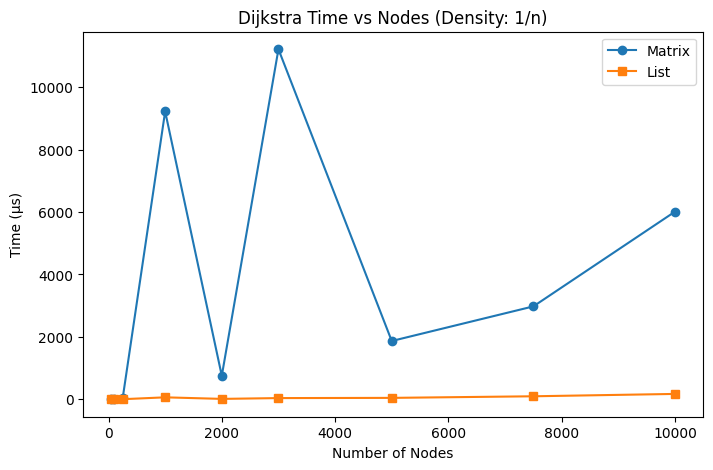

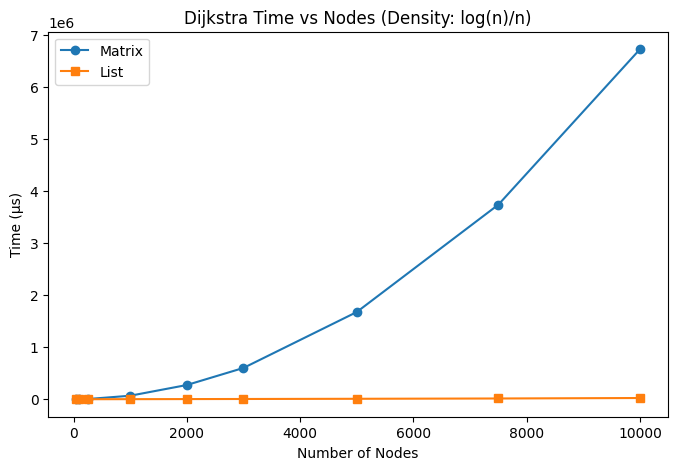

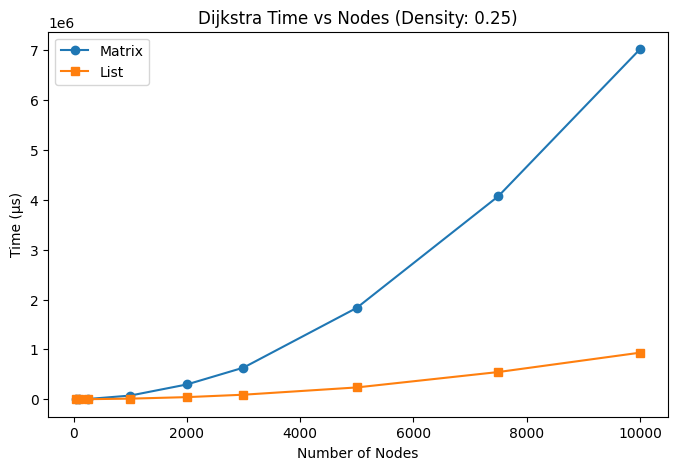

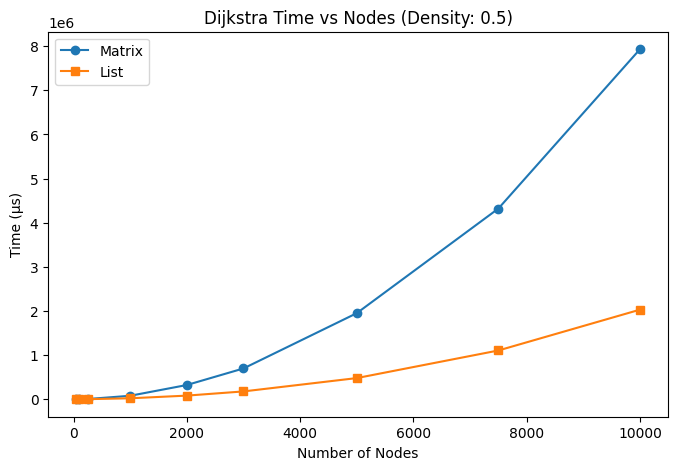

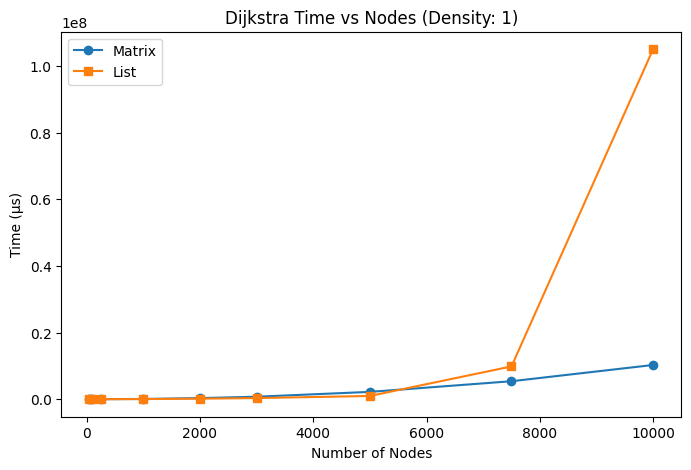

In [5]:
for label in df['density_label'].unique():
    df_filtered = df[df['density_label'] == label]
    
    plt.figure(figsize=(8,5))
    plt.plot(df_filtered['nodes'], df_filtered['time_a'], marker='o', label='Matrix')
    plt.plot(df_filtered['nodes'], df_filtered['time_b'], marker='s', label='List')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Time (µs)')
    plt.title(f'Dijkstra Time vs Nodes (Density: {label})')
    plt.legend()
    plt.show()

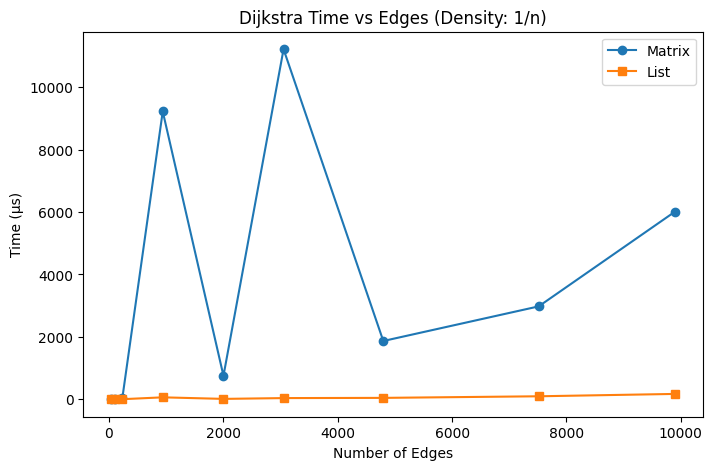

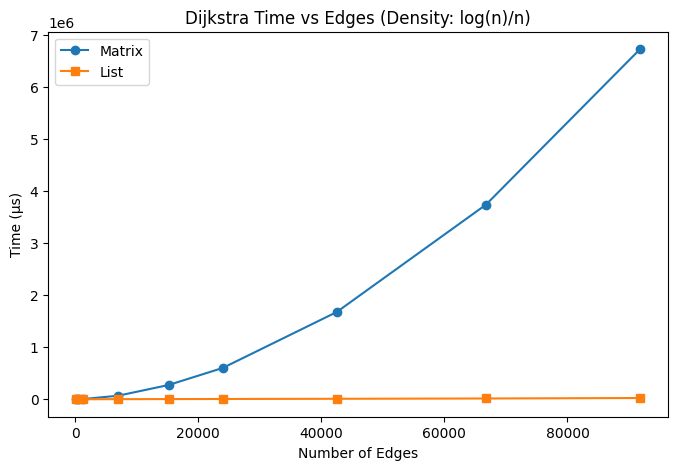

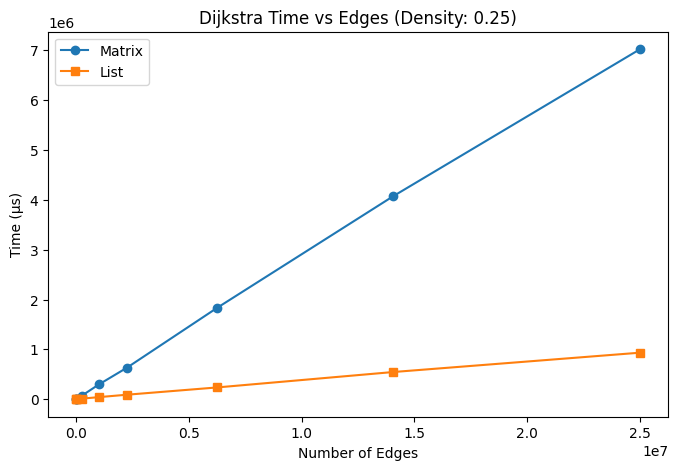

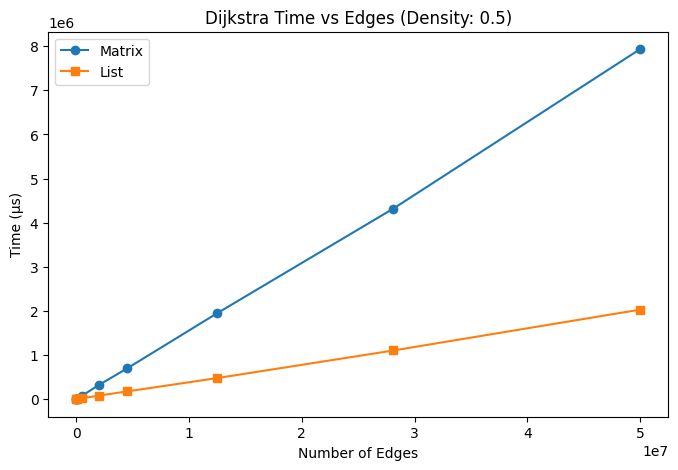

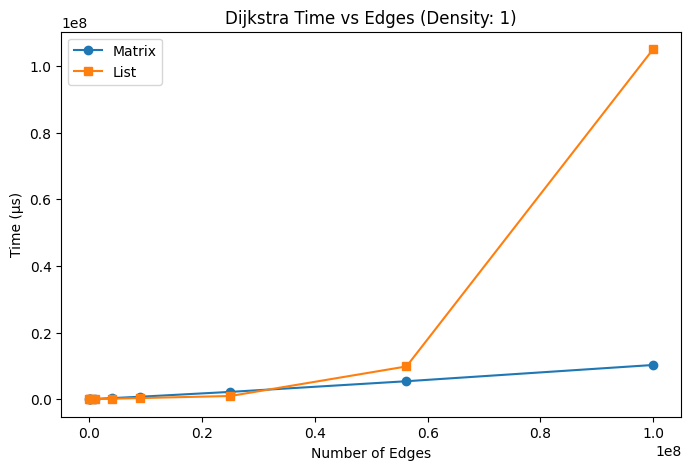

In [6]:
for label in df['density_label'].unique():
    df_filtered = df[df['density_label'] == label]
    
    plt.figure(figsize=(8,5))
    plt.plot(df_filtered['edges'], df_filtered['time_a'], marker='o', label='Matrix')
    plt.plot(df_filtered['edges'], df_filtered['time_b'], marker='s', label='List')
    plt.xlabel('Number of Edges')
    plt.ylabel('Time (µs)')
    plt.title(f'Dijkstra Time vs Edges (Density: {label})')
    plt.legend()
    plt.show()

### Connected Graphs (TO BE DONE)


In [ ]:
df = pd.read_csv("connected_dijkstra_benchmark.csv")

# Assign a group 0,1,2,3 repeating for every 4 rows
df['density_group'] = [i % 5 for i in range(len(df))]
group_labels = {0: "1/n", 1: "log(n)/n", 2: "0.25", 3: "0.5", 4:"1"}
df['density_label'] = df['density_group'].map(group_labels)

In [ ]:
for label in df['density_label'].unique():
    df_filtered = df[df['density_label'] == label]
    
    plt.figure(figsize=(8,5))
    plt.plot(df_filtered['nodes'], df_filtered['time_a'], marker='o', label='Matrix')
    plt.plot(df_filtered['nodes'], df_filtered['time_b'], marker='s', label='List')
    plt.xlabel('Number of Nodes')
    plt.ylabel('Time (µs)')
    plt.title(f'Dijkstra Time vs Nodes (Density: {label})')
    plt.legend()
    plt.show()

In [ ]:
for label in df['density_label'].unique():
    df_filtered = df[df['density_label'] == label]
    
    plt.figure(figsize=(8,5))
    plt.plot(df_filtered['edges'], df_filtered['time_a'], marker='o', label='Matrix')
    plt.plot(df_filtered['edges'], df_filtered['time_b'], marker='s', label='List')
    plt.xlabel('Number of Edges')
    plt.ylabel('Time (µs)')
    plt.title(f'Dijkstra Time vs Edges (Density: {label})')
    plt.legend()
    plt.show()